In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

issues = pd.read_csv('Issue Data.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'body', 'comments', 'labels', 'number', 'title','locked', 'state'])
issues

,repo_id,id,body,comments,labels,number,title,locked,state
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed
...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed


In [2]:
pr = pd.read_csv('Issue Data.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'additions', 'body', 'comments', 'commits', 'deletions', 'merged', 'labels', 'number', 'title', 'state'])
pr

,repo_id,id,body,comments,labels,number,title,state
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,closed
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,closed
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,closed
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,closed
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,closed
...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,closed
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,open
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,closed
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,closed


In [3]:
import re

issues['title_processed'] = issues['title'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

issues['title_processed'] = issues['title_processed'].map(lambda x: x.lower())

pr['title_processed'] = pr['title'].map(
    lambda x: re.sub('[,\.!?]', '', str(x)))

pr['title_processed'] = pr['title_processed'].map(lambda x: x.lower())



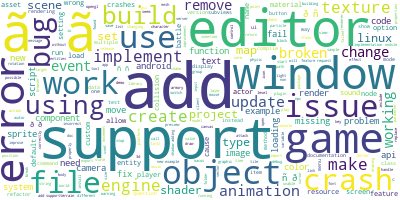

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list([*issues['title_processed'].values, *pr['title_processed'].values]))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'game', 'fix', 'add','error', 'support', 'new', 'api', 'issues', 'ã', 'system'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = issues.title_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['back', 'multiple', 'platform', 'specific', 'impl', 'classes']


In [6]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [7]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=66)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.019*"editor" + 0.007*"linux" + 0.006*"engine" + 0.006*"object" + '
  '0.006*"broken" + 0.006*"crashes" + 0.005*"windows" + 0.005*"rendering" + '
  '0.005*"bug" + 0.005*"scene"'),
 (1,
  '0.014*"editor" + 0.013*"example" + 0.007*"work" + 0.007*"render" + '
  '0.006*"player" + 0.006*"window" + 0.006*"resource" + 0.005*"loading" + '
  '0.005*"implement" + 0.005*"menu"'),
 (2,
  '0.016*"editor" + 0.005*"build" + 0.004*"object" + 0.004*"sprite" + '
  '0.004*"feature" + 0.004*"audio" + 0.004*"crash" + 0.004*"change" + '
  '0.004*"bug" + 0.004*"rendering"'),
 (3,
  '0.008*"camera" + 0.008*"project" + 0.007*"editor" + 0.007*"wrong" + '
  '0.007*"work" + 0.006*"windows" + 0.006*"implement" + 0.005*"correctly" + '
  '0.005*"option" + 0.004*"rendering"'),
 (4,
  '0.012*"update" + 0.009*"android" + 0.008*"file" + 0.007*"work" + '
  '0.005*"bug" + 0.005*"render" + 0.005*"armory" + 0.004*"create" + '
  '0.004*"window" + 0.004*"ui"'),
 (5,
  '0.013*"editor" + 0.011*"engine" + 0.010*"crash" 

In [8]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\gabre\AppData\Roaming\Python\Python38\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.029508  0.039488       1        1  10.789745
8     -0.004153  0.026837       2        1  10.768420
4     -0.005837 -0.096128       3        1  10.742806
5      0.000853 -0.025708       4        1  10.602957
1      0.010178 -0.057283       5        1  10.250998
0      0.013721 -0.002930       6        1   9.843332
6      0.026116  0.027751       7        1   9.722326
7     -0.069115 -0.009492       8        1   9.384236
9      0.112870  0.031862       9        1   9.202411
2     -0.055125  0.065604      10        1   8.692769, topic_info=          Term         Freq        Total Category  logprob  loglift
455     editor  1487.000000  1487.000000  Default  30.0000  30.0000
277    example   357.000000   357.000000  Default  29.0000  29.0000
13      update   342.000000   342.000000  Default  28.0000  28.0000
454      crash   538.000000   538.000000  Default  27.0000  27.0000
199     engine   608.000000   608.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
109       code    32.782972   322.609993  Topic10  -5.8545   0.1561
118    texture    31.783218   294.447862  Topic10  -5.8854   0.2165
198    crashes    30.677009   266.367446  Topic10  -5.9209   0.2813
183  implement    31.729257   389.508625  Topic10  -5.8871  -0.0650
68       using    30.740059   431.928784  Topic10  -5.9188  -0.2000

[829 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
15713      5  0.884695      aas
15701      7  0.856592  academy
719        1  0.049019   access
719        3  0.016340   access
719        4  0.147057   access
...      ...       ...      ...
3856       4  0.036519      ð¾n
3856       5  0.091296      ð¾n
3856       6  0.036519      ð¾n
3856       8  0.219111      ð¾n
3856      10  0.328667      ð¾n

[3019 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 9, 5, 6, 2, 1, 7, 8, 10, 3])